In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


In [119]:
house_data = pd.read_csv("Housing.csv")

In [120]:
house_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [121]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [122]:
house_data.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [123]:
house_data.duplicated().sum()

0

Presupunere: Cu cât cantitatea este mai mare cu atât prețul este mai mare. Pe baza la această idee verificăm corelația preț coloana.

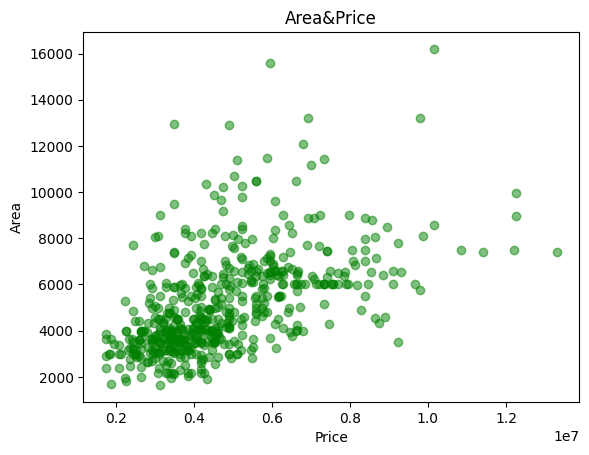

In [124]:
#Cum influenteaza area la pretul casei
plt.scatter(house_data['price'], house_data['area'], color = 'green', alpha = 0.5)
plt.title('Area&Price')
plt.xlabel('Price')
plt.ylabel('Area')
plt.show()

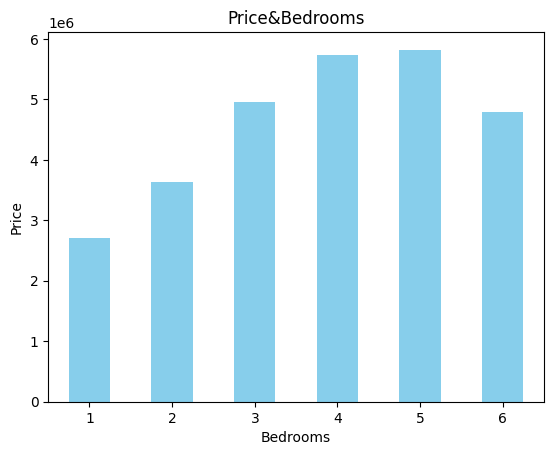

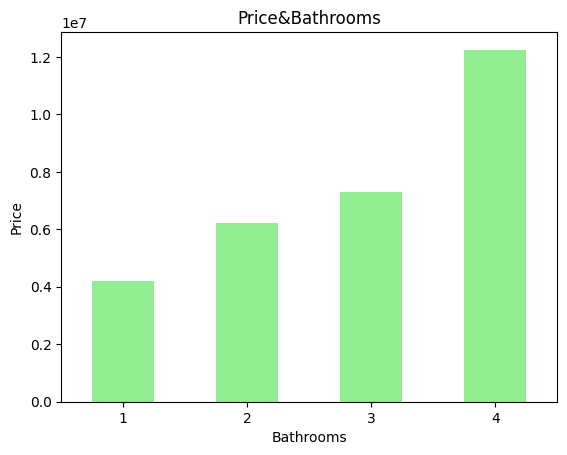

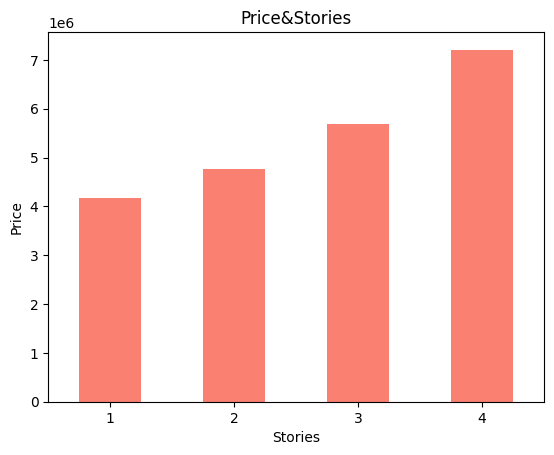

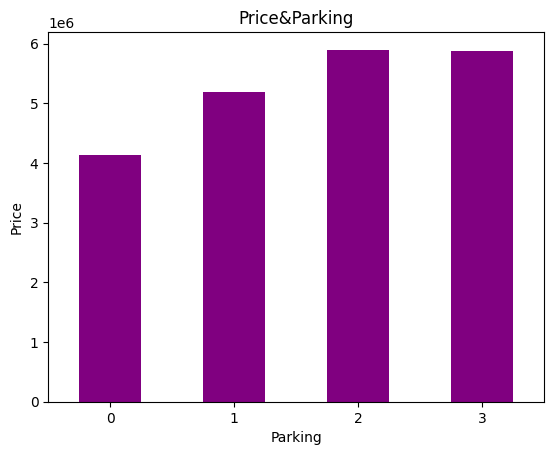

In [125]:
criteria = ['bedrooms', 'bathrooms', 'stories', 'parking']
colors = ['skyblue', 'lightgreen', 'salmon', 'purple']

for i, j in zip(criteria, colors):
    media_bedrooms = house_data.groupby([i])['price'].mean()
    media_bedrooms.plot(kind = 'bar', color = j)
    plt.title(f'Price&{i.capitalize()}')
    plt.xlabel(f'{i.capitalize()}')
    plt.ylabel('Price')
    plt.xticks(rotation = 0)
    plt.show()
    

Verificăm cum influențează prețul "furnishingstatus"


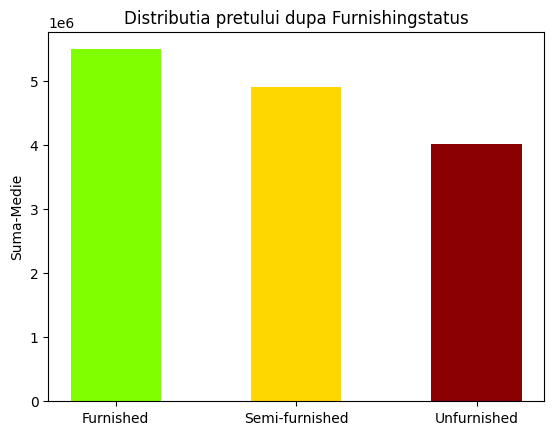

In [126]:
furnished = int(house_data[house_data['furnishingstatus'] == 'furnished']['price'].mean())
semi_furnished = int(house_data[house_data['furnishingstatus'] == 'semi-furnished']['price'].mean())
unfurnished = int(house_data[house_data['furnishingstatus'] == 'unfurnished']['price'].mean())

label = ["Furnished", "Semi-furnished", "Unfurnished"]
li = [furnished, semi_furnished, unfurnished]
colors = ["chartreuse", "gold", "darkred"]
plt.bar(label, li, 0.5, color = colors )
plt.ylabel("Suma-Medie")
plt.title("Distributia pretului dupa Furnishingstatus")
plt.show()

Analizăm cât de tare este necesar un element prin cât de tare afectează prețul prezența acestui element

In [127]:
yes = int(house_data[house_data['mainroad'] == 'yes']['price'].mean())
no = int(house_data[house_data['mainroad'] == 'no']['price'].mean())
li = [yes, no]
li


[4991777, 3398904]

In [128]:
diferenta = f'{100 - int((no * 100) / yes)}%'
diferenta

'32%'

Dacă diferența dintre suma medie a casei este mai mica de 25%, atunci această coloană nu are un impact mare asupra prețului general. Verificăm și notificăm asta prin "pass" și "fail".

In [129]:
lista = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
lista_diferentelor = []
for i in lista:
    status = ""
    yes = int(house_data[house_data[f'{i}'] == 'yes']['price'].mean())
    no = int(house_data[house_data[f'{i}'] == 'no']['price'].mean())
    diferenta = 100 - int((no * 100) / yes)
    if diferenta >= 25:
        status = "Pass"
    else:
        status = "Fail"
    lista_diferentelor.append(i + " = " + str(diferenta) + "% " +  ": " + status)

    

lista_diferentelor

['mainroad = 32% : Pass',
 'guestroom = 22% : Fail',
 'basement = 14% : Fail',
 'hotwaterheating = 15% : Fail',
 'airconditioning = 31% : Pass',
 'prefarea = 25% : Pass']

Scoatem din csv ceea ce are fail

In [130]:
house_data.drop(['guestroom', 'basement', 'hotwaterheating'], axis = 1, inplace = True)
house_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,2,no,furnished


Train it on train

Mai întai facem toate stringurile în integer. Din fericire ele sunt doar "yes" și "no", respectiv aseamănă cu True și False, 0 și 1


In [131]:
house_data['mainroad'] = house_data['mainroad'].map({"yes":0, "no":1})
house_data['prefarea'] = house_data['prefarea'].map({"yes":0, "no":1})
house_data['airconditioning'] = house_data['airconditioning'].map({"yes":0, "no":1})
house_data['furnishingstatus'] = house_data['furnishingstatus'].map({"furnished":0, "unfurnished":1, "semi-furnished":2})
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   airconditioning   545 non-null    int64
 7   parking           545 non-null    int64
 8   prefarea          545 non-null    int64
 9   furnishingstatus  545 non-null    int64
dtypes: int64(10)
memory usage: 42.7 KB


Separăm coloana preț de restul coloanelor.


In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = house_data.drop(["price"], axis = 1)
y = house_data['price']

Antrenăm și testăm pe baza la ceea ce a ramăs in csv

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 33)
#Training
lr = LinearRegression()
lr.fit(X_train,y_train)
#Testing
y_pred = lr.predict(X_test)
#Facem round din float ca resultatul sa fie mai bun
y_pred = [round(elem) for elem in y_pred]
y_pred
lr.score(X_test, y_pred)


0.9999999999999732

Dupa cum vedem rezultatul este bun. Putem încerca să vedem ce rezultat va fi dacă nu scoatem din csv coloanele care au inpact mai mic de 25% asupra prețului.

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

house_data = pd.read_csv("Housing.csv")
house_data['mainroad'] = house_data['mainroad'].map({"yes":0, "no":1})
house_data['guestroom'] = house_data['guestroom'].map({"yes":0, "no":1})
house_data['basement'] = house_data['basement'].map({"yes":0, "no":1})
house_data['hotwaterheating'] = house_data['hotwaterheating'].map({"yes":0, "no":1})
house_data['prefarea'] = house_data['prefarea'].map({"yes":0, "no":1})
house_data['airconditioning'] = house_data['airconditioning'].map({"yes":0, "no":1})
house_data['furnishingstatus'] = house_data['furnishingstatus'].map({"furnished":0, "unfurnished":1, "semi-furnished":2})

X = house_data.drop(["price"], axis = 1)
y = house_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2, random_state = 33)
#Training
lr = LinearRegression()
lr.fit(X_train,y_train)
#Testing
y_pred = lr.predict(X_test)
y_pred = [round(elem) for elem in y_pred]
y_pred
lr.score(X_test, y_pred)


0.9999999999999732

Rezultatul este un pic mai bun decât acel de mai sus. Facem concluzia că cu cât mai multe coloane are csv-ul cu atât precizia la machine learning este mai bună. Totodată, asta înseamnă că lichidarea coloanelor cu inpactul mai puțin de 25% nu influențează practic deloc precizia codului, respectiv, nu deranjează scoaterea coloanelor. 